# Notebook Test Formulaire Logiciels Synchrotron SOLEIL
Inspiré de : https://github.com/eteq/software_survey_analysis/blob/master/software_survey.ipynb

In [1]:
import astropy
import astropy.table
import astropy.io.ascii
import numpy as np
from scipy import optimize

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.size'] = 12

save_plots = True # set to true to save the plots to disk in addition to showing them in the notebook

In [3]:
data = astropy.io.ascii.read('Formulaire documentation logiciels - questions par logiciel.csv', comment='#', delimiter=',')

Attention a bien avoir un fichier non changé à partir du Google Form

In [4]:
data

<Table length=7>
         Horodateur          ...
           str28             ...
---------------------------- ...
 2020/10/05 5:54:56 PM UTC+2 ...
 2020/10/05 6:00:53 PM UTC+2 ...
 2020/10/05 6:09:04 PM UTC+2 ...
 2020/10/05 6:59:09 PM UTC+2 ...
2020/10/06 10:49:27 AM UTC+2 ...
2020/10/06 10:55:11 AM UTC+2 ...
2020/10/06 11:04:59 AM UTC+2 ...

In [5]:
data['Quel type d\'utilisateur êtes-vous ?']

<Column name="Quel type d'utilisateur êtes-vous ?" dtype='str43' length=7>
Développeur de logiciel scientifique/script
Développeur de logiciel scientifique/script
Développeur de logiciel scientifique/script
Développeur de logiciel scientifique/script
Développeur de logiciel scientifique/script
Développeur de logiciel scientifique/script
                     Personnel Soleil autre

In [6]:
data['Sur quels systèmes d’exploitation peut-on installer le logiciel ? Si vous le savez, quel type de packaging est utilisé ?']

<Column name='Sur quels systèmes d’exploitation peut-on installer le logiciel ? Si vous le savez, quel type de packaging est utilisé ?' dtype='str19' length=7>
Linux;MacOS;Windows
            Windows
              Linux
      Linux;Windows
      Linux;Windows
Linux;MacOS;Windows
Windows;Linux;MacOS

## Essais

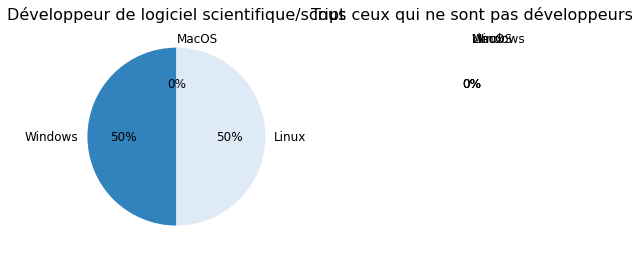

In [7]:
os_dev = [np.sum((data['Quel type d\'utilisateur êtes-vous ?'] == 'Développeur de logiciel scientifique/script') & (data['Sur quels systèmes d’exploitation peut-on installer le logiciel ? Si vous le savez, quel type de packaging est utilisé ?'] == 'Windows')), np.sum((data['Quel type d\'utilisateur êtes-vous ?'] == 'Développeur de logiciel scientifique/script') & (data['Sur quels systèmes d’exploitation peut-on installer le logiciel ? Si vous le savez, quel type de packaging est utilisé ?'] == 'Linux')), np.sum((data['Quel type d\'utilisateur êtes-vous ?'] == 'Développeur de logiciel scientifique/script') & (data['Sur quels systèmes d’exploitation peut-on installer le logiciel ? Si vous le savez, quel type de packaging est utilisé ?'] == 'MacOS'))]
os_others = [np.sum((data['Quel type d\'utilisateur êtes-vous ?'] != 'Développeur de logiciel scientifique/script') & (data['Sur quels systèmes d’exploitation peut-on installer le logiciel ? Si vous le savez, quel type de packaging est utilisé ?'] == 'Windows')), np.sum((data['Quel type d\'utilisateur êtes-vous ?'] != 'Développeur de logiciel scientifique/script') & (data['Sur quels systèmes d’exploitation peut-on installer le logiciel ? Si vous le savez, quel type de packaging est utilisé ?'] == 'Linux')), np.sum((data['Quel type d\'utilisateur êtes-vous ?'] != 'Développeur de logiciel scientifique/script') & (data['Sur quels systèmes d’exploitation peut-on installer le logiciel ? Si vous le savez, quel type de packaging est utilisé ?'] == 'MacOS'))]

fig,axes =plt.subplots(1, 2, sharey=False, figsize=(15.,9.))

labels = ['Windows','Linux','MacOS']

#fig = plt.figure(1,figsize=(12,10))
a1 = plt.subplot(2,3,1)

colors = ['#3182bd','#deebf7','#9ecae1']
a1.pie(os_dev, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a1.set_title('Développeur de logiciel scientifique/script', fontsize=16)

a2 = plt.subplot(2,3,2)

colors = ['#3182bd','#deebf7','#9ecae1']
a2.pie(os_others, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=90)
a2.set_title('Tous ceux qui ne sont pas développeurs', fontsize=16)

if save_plots:
    plt.savefig('os_by_dev.png')

In [8]:
np.sum(data['Quel type d\'utilisateur êtes-vous ?'] == 'Développeur de logiciel scientifique/script')

6

## Essais pandas

In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('Formulaire documentation logiciels - questions par logiciel.csv')

In [11]:
df

Horodateur          Quel type d'utilisateur êtes-vous ?  \
0   2020/10/05 5:54:56 PM UTC+2  Développeur de logiciel scientifique/script   
1   2020/10/05 6:00:53 PM UTC+2  Développeur de logiciel scientifique/script   
2   2020/10/05 6:09:04 PM UTC+2  Développeur de logiciel scientifique/script   
3   2020/10/05 6:59:09 PM UTC+2  Développeur de logiciel scientifique/script   
4  2020/10/06 10:49:27 AM UTC+2  Développeur de logiciel scientifique/script   
5  2020/10/06 10:55:11 AM UTC+2  Développeur de logiciel scientifique/script   
6  2020/10/06 11:04:59 AM UTC+2                       Personnel Soleil autre   

   Sur quelle ligne de lumière êtes-vous ?  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
5                                      NaN   
6                                      NaN   

  Donnez le nom du logiciel que vous utilisez :   \
0                                           CCP4   
1                                   CrysAlis Pro   
2                                        CRYSTAL   
3                                         FDMNES   
4                                          FEFF9   
5                                        Demeter   
6                                          FIT2D   

      Expliquez brièvement à quoi sert ce logiciel :  \
0  CCP4 is an integrated suite of programs that a...   
1  Data collection and data processing software f...   
2  Computational tool for solid state physics and...   
3  The aim of the FDMNES project is to supply to ...   
4  Condensed matter code for modelling x-ray and ...   
5  Demeter is a comprehensive system for processi...   
6  FIT2D is a general purpose 1 and 2 dimensional...   

  Comment estimez-vous l'importance de ce logiciel ?  \
0                                     Je ne sais pas   
1                                     Je ne sais pas   
2                                     Je ne sais pas   
3                                     Je ne sais pas   
4                                     Je ne sais pas   
5                                     Je ne sais pas   
6                                     Je ne sais pas   

  Quels sont les formats de données de l'on donne au logiciel ?  \
0                                      EDF, CBF, MTZ              
1       CIF, EDF, TIFF - MARCCD, CBF, D*Trek, Bruker              
2                                              ASCII              
3                                              ASCII              
4                                              ASCII              
5                                        ASCII, JSON              
6  RAW, ASCII, TIFF, CIF, EDF, BSL - OTOKO, FUJI ...              

                   Quels formats peut-on récupérer ?  \
0                                      CIF, CBF, MTZ   
1                          CIF, CBF, HKLF, ESPERANTO   
2                                              ASCII   
3                                              ASCII   
4                                              ASCII   
5                                        ASCII, JSON   
6  RAW, FullProf, ASCII, TIFF, CIF, EDF, PDF, BSL...   

   Où sont stockées les données traitées ?  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
5                                      NaN   
6                                      NaN   

  D’où viennent les sources du logiciel ?  ...  \
0                             Open source  ...   
1                                   Privé  ...   
2                                   Privé  ...   
3                                   Privé  ...   
4                                   Privé  ...   
5                             Open source

In [13]:
print(df.columns)

Index(['Horodateur', 'Quel type d'utilisateur êtes-vous ?',
       'Sur quelle ligne de lumière êtes-vous ?',
       'Donnez le nom du logiciel que vous utilisez : ',
       'Expliquez brièvement à quoi sert ce logiciel :',
       'Comment estimez-vous l'importance de ce logiciel ?',
       'Quels sont les formats de données de l'on donne au logiciel ?',
       'Quels formats peut-on récupérer ?',
       'Où sont stockées les données traitées ?',
       'D’où viennent les sources du logiciel ?',
       'Quelle est la licence d'utilisation du logiciel ?',
       'Est-ce que le code source pourrait être distribué ? Si c'est déjà le cas, vous pouvez nous partager le lien du dépôt avec la réponse "Autre :".',
       'Comment se passe l'installation du logiciel ?',
       'Sur quels systèmes d’exploitation peut-on installer le logiciel ? Si vous le savez, quel type de packaging est utilisé ?',
       'Comment se passe le développement du logiciel ?',
       'Combien de personnes s'occupent 

In [26]:
from string import ascii_lowercase

df.columns = list(ascii_lowercase)

In [27]:
df

a                                            b  \
0   2020/10/05 5:54:56 PM UTC+2  Développeur de logiciel scientifique/script   
1   2020/10/05 6:00:53 PM UTC+2  Développeur de logiciel scientifique/script   
2   2020/10/05 6:09:04 PM UTC+2  Développeur de logiciel scientifique/script   
3   2020/10/05 6:59:09 PM UTC+2  Développeur de logiciel scientifique/script   
4  2020/10/06 10:49:27 AM UTC+2  Développeur de logiciel scientifique/script   
5  2020/10/06 10:55:11 AM UTC+2  Développeur de logiciel scientifique/script   
6  2020/10/06 11:04:59 AM UTC+2                       Personnel Soleil autre   

    c             d                                                  e  \
0 NaN          CCP4  CCP4 is an integrated suite of programs that a...   
1 NaN  CrysAlis Pro  Data collection and data processing software f...   
2 NaN       CRYSTAL  Computational tool for solid state physics and...   
3 NaN        FDMNES  The aim of the FDMNES project is to supply to ...   
4 NaN         FEFF9  Condensed matter code for modelling x-ray and ...   
5 NaN       Demeter  Demeter is a comprehensive system for processi...   
6 NaN         FIT2D  FIT2D is a general purpose 1 and 2 dimensional...   

                f                                                  g  \
0  Je ne sais pas                                      EDF, CBF, MTZ   
1  Je ne sais pas       CIF, EDF, TIFF - MARCCD, CBF, D*Trek, Bruker   
2  Je ne sais pas                                              ASCII   
3  Je ne sais pas                                              ASCII   
4  Je ne sais pas                                              ASCII   
5  Je ne sais pas                                        ASCII, JSON   
6  Je ne sais pas  RAW, ASCII, TIFF, CIF, EDF, BSL - OTOKO, FUJI ...   

                                                   h   i            j  ...  \
0                                      CIF, CBF, MTZ NaN  Open source  ...   
1                          CIF, CBF, HKLF, ESPERANTO NaN        Privé  ...   
2                                              ASCII NaN        Privé  ...   
3                                              ASCII NaN        Privé  ...   
4                                              ASCII NaN        Privé  ...   
5                                        ASCII, JSON NaN  Open source  ...   
6  RAW, FullProf, ASCII, TIFF, CIF, EDF, PDF, BSL... NaN  Open source  ...   

    q   r               s               t   u    v  \
0 NaN NaN  Je ne sais pas  Je ne sais pas NaN  Oui   
1 NaN NaN  Je ne sais pas  Je ne sais pas NaN  Oui   
2 NaN NaN  Je ne sais pas  Je ne sais pas NaN  Oui   
3 NaN NaN  Je ne sais pas  Je ne sais pas NaN  Oui   
4 NaN NaN  Je ne sais pas  Je ne sais pas NaN  Oui   
5 NaN NaN  Je ne sais pas  Je ne sais pas NaN  Oui   
6 NaN NaN  Je ne sais pas  Je ne sais pas NaN  Oui   

                                                   w  \
0     Sur internet;http://legacy.ccp4.ac.uk/docs.php   
1  Sur internet;https://www.agilent.com/cs/librar...   
2  Sur internet;https://www.crystal.unito.it/Manu...   
3                                       Sur internet   
4  Sur internet;http://monalisa.phys.washington.e...   
5  Sur internet;http://bruceravel.github.io/demeter/   
6  Sur internet;http://www.esrf.eu/computing/scie...   

                                                   x   y   z  
0  L'entreprise/la fondation/l'organisme qui four... NaN NaN  
1  L'entreprise/la fondation/l'organisme qui four... NaN NaN  
2  L'entreprise/la fondation/l'organisme qui four... NaN NaN  
3  L'entreprise/la fondation/l'organisme qui four... NaN NaN  
4  L'entreprise/la fondation/l'organisme qui four... NaN NaN  
5  L'entreprise/la fondation/l'organisme qui four... NaN NaN  
6  L'entreprise/la fondation/l'organisme qui four... NaN NaN  

[7 rows x 26 columns]

In [34]:
from collections import Counter
Counter(df['b'])

Counter({'Développeur de logiciel scientifique/script': 6,
         'Personnel Soleil autre': 1})

<BarContainer object of 2 artists>

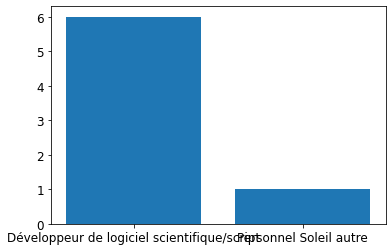

In [38]:
plt.bar(Counter(df['b']).keys(), Counter(df['b']).values())

In [40]:
import pandasql as ps

ModuleNotFoundError: No module named 'pandasql'

In [41]:
import sys
!{sys.executable} -m pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26817 sha256=2512fcddd0785ef13b591a640176d0218edee76cfb0a8d9f4baca74877a6158c
  Stored in directory: /home/aurelien-castel/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [44]:
import pandasql as ps
ps.sqldf("select * from df")

a                                            b  \
0   2020/10/05 5:54:56 PM UTC+2  Développeur de logiciel scientifique/script   
1   2020/10/05 6:00:53 PM UTC+2  Développeur de logiciel scientifique/script   
2   2020/10/05 6:09:04 PM UTC+2  Développeur de logiciel scientifique/script   
3   2020/10/05 6:59:09 PM UTC+2  Développeur de logiciel scientifique/script   
4  2020/10/06 10:49:27 AM UTC+2  Développeur de logiciel scientifique/script   
5  2020/10/06 10:55:11 AM UTC+2  Développeur de logiciel scientifique/script   
6  2020/10/06 11:04:59 AM UTC+2                       Personnel Soleil autre   

      c             d                                                  e  \
0  None          CCP4  CCP4 is an integrated suite of programs that a...   
1  None  CrysAlis Pro  Data collection and data processing software f...   
2  None       CRYSTAL  Computational tool for solid state physics and...   
3  None        FDMNES  The aim of the FDMNES project is to supply to ...   
4  None         FEFF9  Condensed matter code for modelling x-ray and ...   
5  None       Demeter  Demeter is a comprehensive system for processi...   
6  None         FIT2D  FIT2D is a general purpose 1 and 2 dimensional...   

                f                                                  g  \
0  Je ne sais pas                                      EDF, CBF, MTZ   
1  Je ne sais pas       CIF, EDF, TIFF - MARCCD, CBF, D*Trek, Bruker   
2  Je ne sais pas                                              ASCII   
3  Je ne sais pas                                              ASCII   
4  Je ne sais pas                                              ASCII   
5  Je ne sais pas                                        ASCII, JSON   
6  Je ne sais pas  RAW, ASCII, TIFF, CIF, EDF, BSL - OTOKO, FUJI ...   

                                                   h     i            j  ...  \
0                                      CIF, CBF, MTZ  None  Open source  ...   
1                          CIF, CBF, HKLF, ESPERANTO  None        Privé  ...   
2                                              ASCII  None        Privé  ...   
3                                              ASCII  None        Privé  ...   
4                                              ASCII  None        Privé  ...   
5                                        ASCII, JSON  None  Open source  ...   
6  RAW, FullProf, ASCII, TIFF, CIF, EDF, PDF, BSL...  None  Open source  ...   

      q     r               s               t     u    v  \
0  None  None  Je ne sais pas  Je ne sais pas  None  Oui   
1  None  None  Je ne sais pas  Je ne sais pas  None  Oui   
2  None  None  Je ne sais pas  Je ne sais pas  None  Oui   
3  None  None  Je ne sais pas  Je ne sais pas  None  Oui   
4  None  None  Je ne sais pas  Je ne sais pas  None  Oui   
5  None  None  Je ne sais pas  Je ne sais pas  None  Oui   
6  None  None  Je ne sais pas  Je ne sais pas  None  Oui   

                                                   w  \
0     Sur internet;http://legacy.ccp4.ac.uk/docs.php   
1  Sur internet;https://www.agilent.com/cs/librar...   
2  Sur internet;https://www.crystal.unito.it/Manu...   
3                                       Sur internet   
4  Sur internet;http://monalisa.phys.washington.e...   
5  Sur internet;http://bruceravel.github.io/demeter/   
6  Sur internet;http://www.esrf.eu/computing/scie...   

                                                   x     y     z  
0  L'entreprise/la fondation/l'organisme qui four...  None  None  
1  L'entreprise/la fondation/l'organisme qui four...  None  None  
2  L'entreprise/la fondation/l'organisme qui four...  None  None  
3  L'entreprise/la fondation/l'organisme qui four...  None  None  
4  L'entreprise/la fondation/l'organisme qui four...  None  None  
5  L'entreprise/la fondation/l'organisme qui four...  None  None  
6  L'entreprise/la fondation/l'organisme qui four...  None  None  

[7 rows x 26 columns]